In [97]:
import requests
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
!pip3 install matplotlib
from matplotlib import pyplot as plt

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [98]:
def download_mnist():
    return input_data.read_data_sets("MNIST_data/", one_hot = True)
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d,cmap=plt.cm.gray_r, interpolation='nearest')
    return plt

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


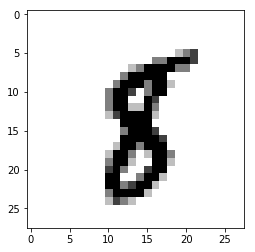

In [99]:
mnist = download_mnist()
batch_xs, batch_ys = mnist.train.next_batch(1)
chosen=0
gen_image(batch_xs[chosen]).show()
data = batch_xs[chosen].reshape((1,784))
features = ["X"+str(i+1) for i in range (0,784)]
request = {"data":{"names":features,"ndarray":data.tolist()}}

In [112]:
deploymentName = "mnist-classifier"
AMBASSADOR_API_IP="ambassador"
uri = "http://"+AMBASSADOR_API_IP+"/seldon/"+deploymentName+"/api/v0.1/predictions"

In [113]:
response = requests.post(
    uri,
    json=request)

In [114]:
print(response.text)

{
  "meta": {
    "puid": "kr8h50fonorje0d0cvgl7cnj70",
    "tags": {
    },
    "routing": {
    }
  },
  "data": {
    "names": ["class:0", "class:1", "class:2", "class:3", "class:4", "class:5", "class:6", "class:7", "class:8", "class:9"],
    "ndarray": [[0.06666666666666667, 0.23333333333333334, 0.1, 0.06666666666666667, 0.06666666666666667, 0.13333333333333333, 0.03333333333333333, 0.26666666666666666, 0.03333333333333333, 0.0]]
  }
}
